In [7]:
PRFX = 'CVBbox0905_1'
PREP_PRFX = 'Prepbbox0903'

HOME = '/tmp/working/data/git/cld'
p_output = f'{HOME}/output/{PRFX}'
from pathlib import Path
Path(p_output).mkdir(exist_ok=True)

In [8]:
# cd {HOME}/input

# !git clone https://github.com/fizyr/keras-retinanet.git

# cd {HOME}/input/keras-retinanet/

# !python setup.py build_ext --inplace

# cd {HOME}/input/

# !wget --quiet https://github.com/fizyr/keras-retinanet/releases/download/0.3.1/resnet50_coco_best_v2.1.0.h5

# !pip install {HOME}/input/keras-retinanet --user

- https://github.com/fizyr/keras-retinanet/blob/master/keras_retinanet/bin/train.py
- http://localhost:8889/notebooks/git/Research/imgcat/nbs/2018-07-05/retinanet_openimages-clothing-parts-crop.ipynb
- https://github.com/fizyr/keras-retinanet/blob/master/examples/ResNet50RetinaNet.ipynb

In [9]:
SEED = 100
PERC_VAL = 0.15
BS = 4
EPOCHS = 10
FN_LBLS = f'{HOME}/output/{PREP_PRFX}/lbls.csv'

dbg = False
if dbg: 
    EPOCHS = 1
    dbgsz = 50

In [10]:
import pandas as pd
import numpy as np

# prep

In [17]:
col_names = ['Image', 'x1', 'y1', 'x2', 'y2', 'Label']
df_boxes = pd.read_csv(f'{HOME}/output/{PREP_PRFX}/boxes.csv', header=None, names=col_names)

df_boxes.head()

Image   x1   y1    x2    y2   Label
0  0011165.jpg  189  317  1183  1253    Fish
1  0011165.jpg  968  313  2094  1365  Flower
2  002be4f.jpg  167    9  2086   889    Fish
3  002be4f.jpg  956  878  2097  1396  Flower
4  002be4f.jpg   48  294   944   643   Sugar

In [18]:
if dbg: df_boxes = df_boxes.head(dbgsz)

In [19]:
df_boxes.Image = f'{HOME}/input/train_images/'+df_boxes.Image

In [20]:
imgs = np.array(list(set(df_boxes.Image)))

np.random.seed(SEED)
msk_val = np.random.rand(len(imgs))<PERC_VAL
imgs_trn = imgs[~msk_val]
imgs_val = imgs[msk_val]

print(len(imgs), len(imgs_trn), len(imgs_val))

df_boxes_trn = df_boxes[df_boxes.Image.isin(imgs_trn)]
df_boxes_val = df_boxes[df_boxes.Image.isin(imgs_val)]
print(df_boxes_trn.shape, df_boxes_val.shape)

steps = len(imgs_trn)//BS


5546 4684 862
(10010, 6) (1826, 6)


In [21]:
df_boxes_trn.to_csv(f'{HOME}/output/{PRFX}/boxes_trn.csv', index=False, header=None)
df_boxes_val.to_csv(f'{HOME}/output/{PRFX}/boxes_val.csv', index=False, header=None)

# train

In [10]:
!{HOME}/input/keras-retinanet/keras_retinanet/bin/train.py \
--weights $HOME/input/resnet50_coco_best_v2.1.0.h5 \
--epochs $EPOCHS \
--steps $steps \
--batch-size $BS \
--snapshot-path $p_output \
csv {HOME}/output/{PRFX}/boxes_trn.csv $FN_LBLS

Using TensorFlow backend.
2019-09-06 03:11:14.890462: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300095000 Hz
2019-09-06 03:11:14.891109: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55d293b1c040 executing computations on platform Host. Devices:
2019-09-06 03:11:14.891151: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-09-06 03:11:14.996141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-09-06 03:11:14.997095: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55d293beba20 executing computations on platform CUDA. Devices:
2019-09-06 03:11:14.997132: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2019-09-06 03:11:14.997887: I tensorflow/core

Epoch 1/10
1171/1171 [==============================] - 812s 693ms/step - loss: 2.5118 - regression_loss: 1.9224 - classification_loss: 0.5894

Epoch 00001: saving model to /tmp/working/data/git/cld/output/CVBbox0905_1/resnet50_csv_01.h5
Epoch 2/10
1171/1171 [==============================] - 869s 743ms/step - loss: 2.1870 - regression_loss: 1.7443 - classification_loss: 0.4428

Epoch 00002: saving model to /tmp/working/data/git/cld/output/CVBbox0905_1/resnet50_csv_02.h5
Epoch 3/10
1171/1171 [==============================] - 896s 765ms/step - loss: 2.0874 - regression_loss: 1.6698 - classification_loss: 0.4176

Epoch 00003: saving model to /tmp/working/data/git/cld/output/CVBbox0905_1/resnet50_csv_03.h5
Epoch 4/10
1171/1171 [==============================] - 860s 735ms/step - loss: 2.0265 - regression_loss: 1.6238 - classification_loss: 0.4027

Epoch 00004: saving model to /tmp/working/data/git/cld/output/CVBbox0905_1/resnet50_csv_04.h5
Epoch 5/10
1171/1171 [==========================

In [11]:
dd='10'

fn_mdl = f"resnet50_csv_{dd}.h5"
pth_mdl = f"{p_output}/{fn_mdl}"
pth_pred_mdl = f"{p_output}/prd_{fn_mdl}"

fn_mdl, pth_mdl, pth_pred_mdl

('resnet50_csv_10.h5',
 '/tmp/working/data/git/cld/output/CVBbox0905_1/resnet50_csv_10.h5',
 '/tmp/working/data/git/cld/output/CVBbox0905_1/prd_resnet50_csv_10.h5')

# pred

In [39]:
!{HOME}/input/keras-retinanet/keras_retinanet/bin/convert_model.py  $pth_mdl $pth_pred_mdl

Using TensorFlow backend.
2019-09-06 15:29:44.866467: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300095000 Hz
2019-09-06 15:29:44.867054: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x556c2393a530 executing computations on platform Host. Devices:
2019-09-06 15:29:44.867101: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-09-06 15:29:44.872070: E tensorflow/stream_executor/cuda/cuda_driver.cc:300] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2019-09-06 15:29:44.872119: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:161] retrieving CUDA diagnostic information for host: ecf33a102628
2019-09-06 15:29:44.872139: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:168] hostname: ecf33a102628
2019-09-06 15:29:44.872212: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:192] libcuda reported version is: 418.56.0
2019-09-06 15:29:44.872250

In [78]:
from keras_retinanet.models import load_model
import time
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
import matplotlib.pyplot as plt
import cv2

In [13]:
nm2lbl = dict(pd.read_csv(FN_LBLS, header=None).values)
lbl2nm = {v:k for k,v in nm2lbl.items()}

In [14]:
model = load_model(pth_pred_mdl, backbone_name='resnet50')

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [70]:
def demo_retinanet(img):
    print(img)
    # load image
    image = read_image_bgr(img)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale

    # visualize detections
    score_threshold_draw = 0.5
    score_threshold_print = 0.5
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if label < 0: continue
        if score < score_threshold_print: break
        print(lbl2nm[label], score)  
        if score < score_threshold_draw: continue
        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(lbl2nm[label], score)
        draw_caption(draw, b, caption)
    plt.figure(figsize=(50, 50))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()

In [75]:
img = df_boxes_val.Image.sample().values[0]

/tmp/working/data/git/cld/input/train_images/1e5e148.jpg
processing time:  0.054276466369628906
Sugar 0.522196


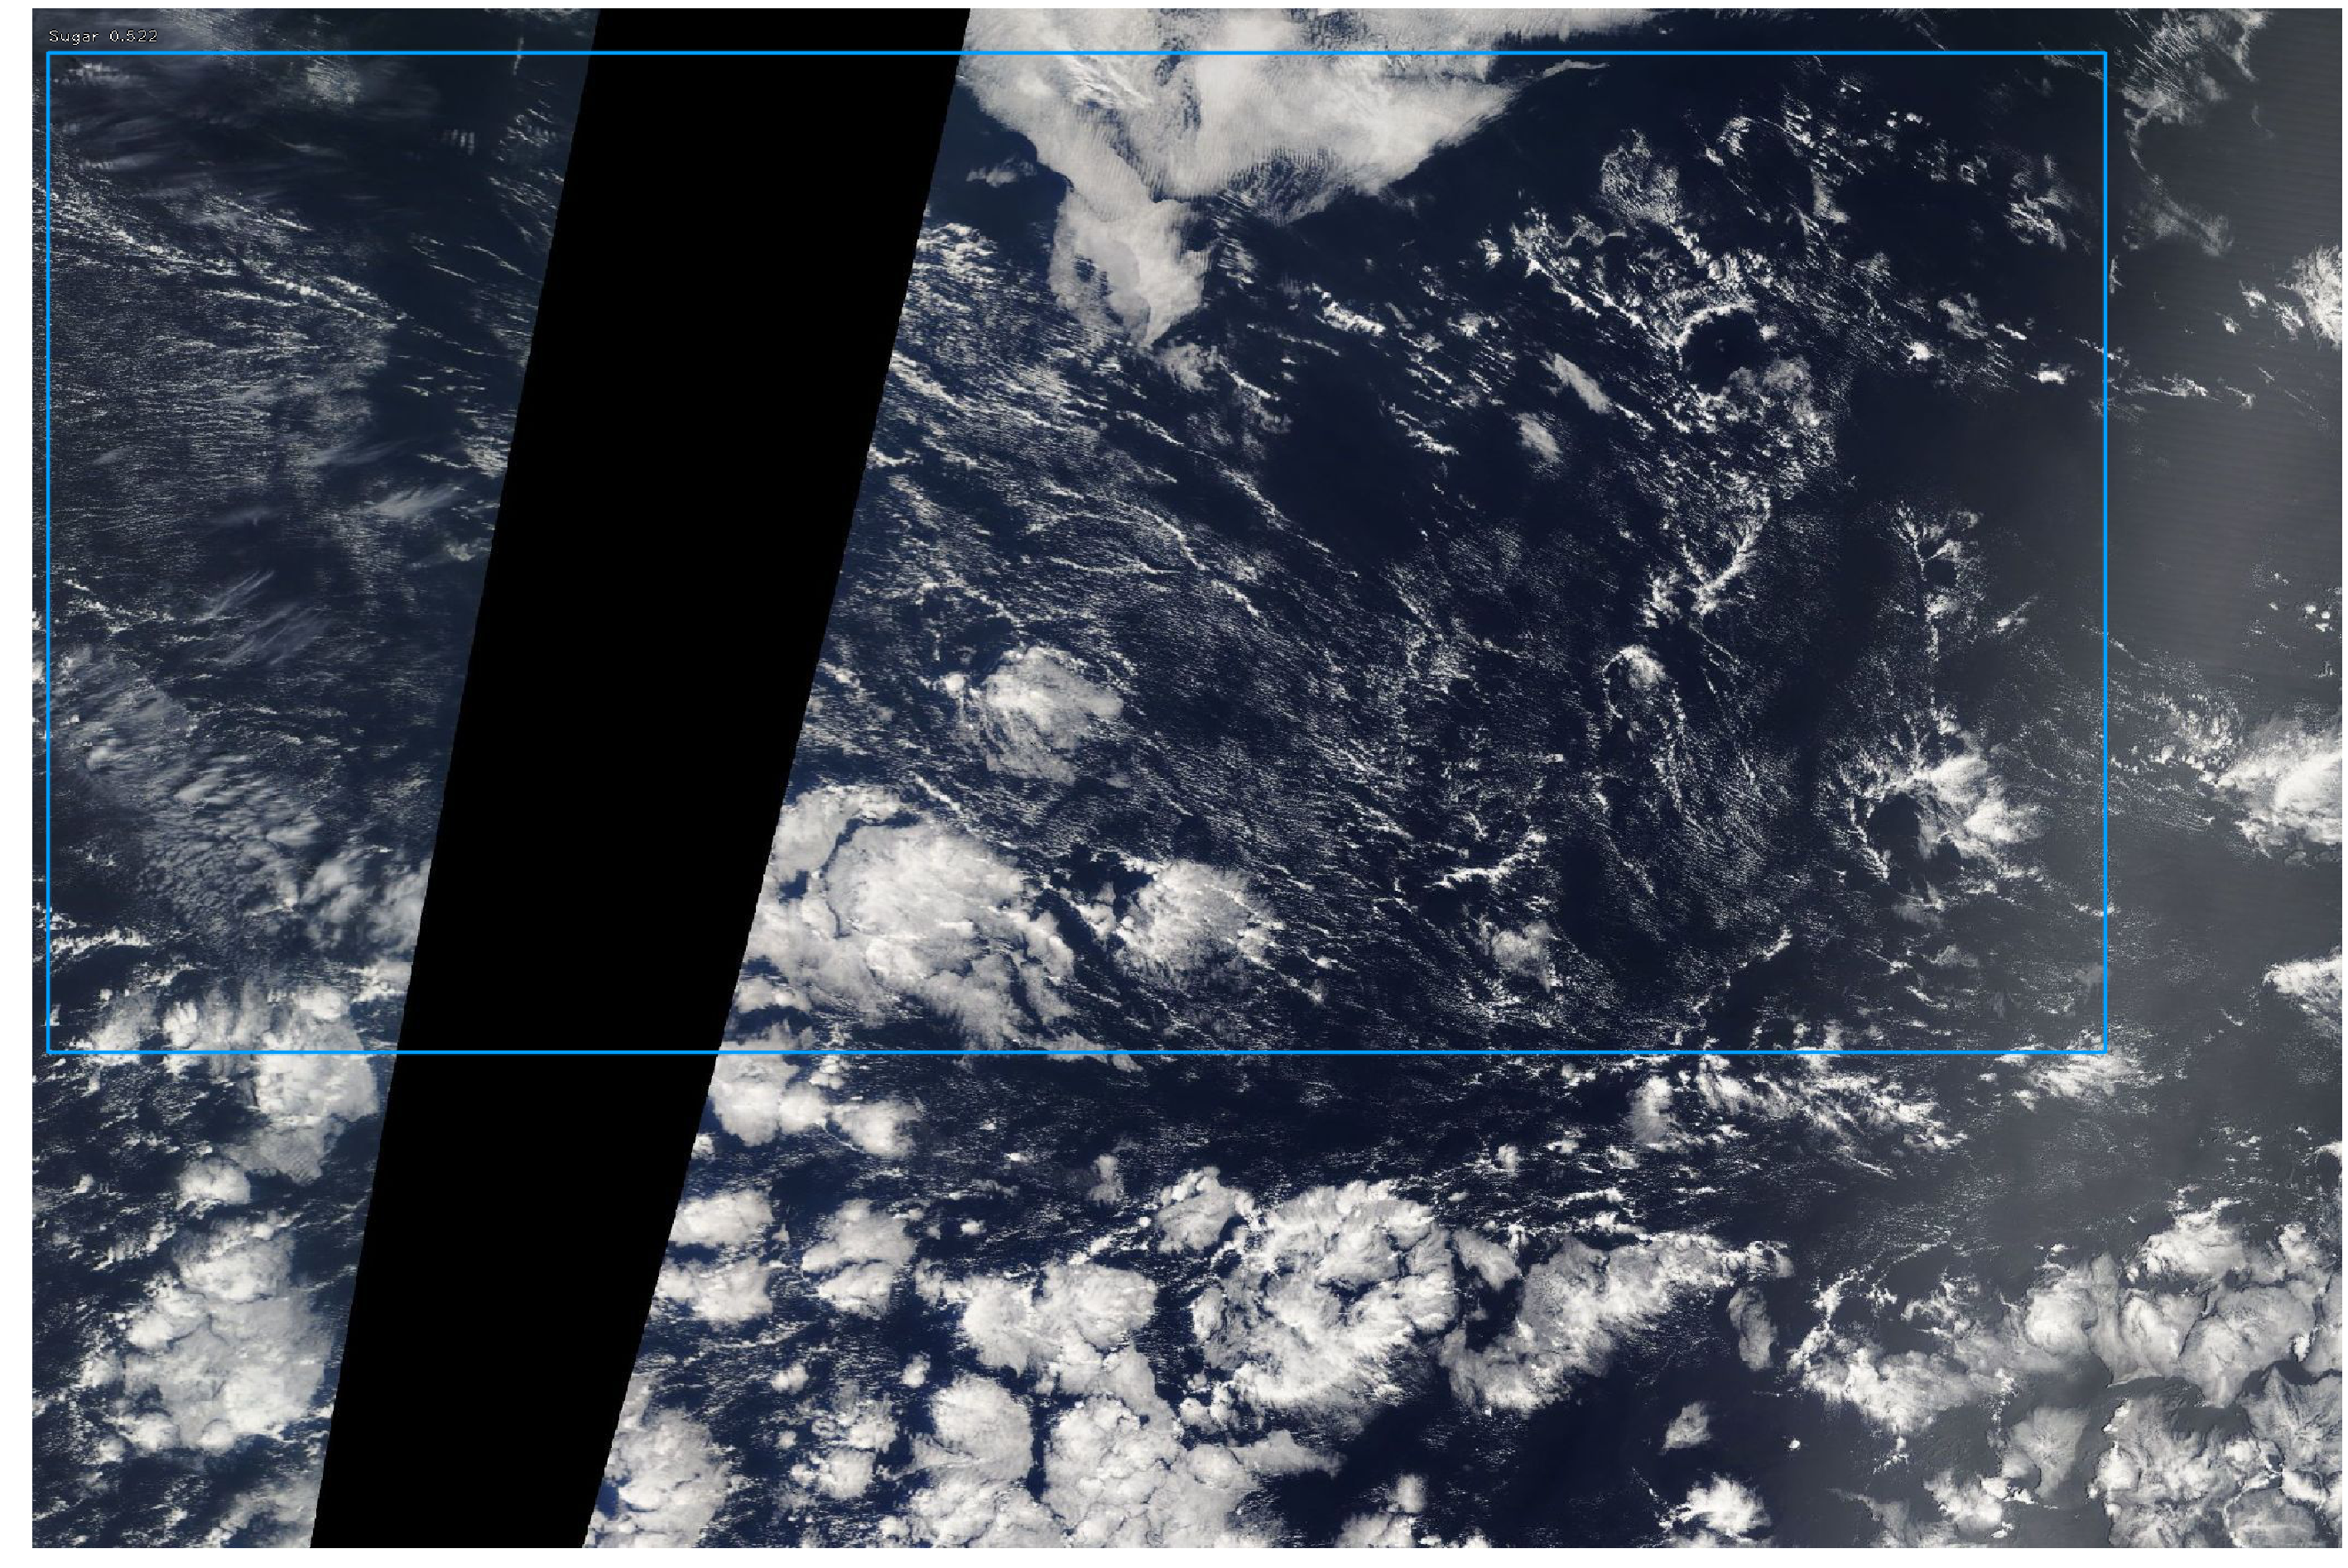

In [76]:
demo_retinanet(img)